In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder


In [4]:
data=pd.read_csv("Traffic_Violations.csv")

/var/folders/46/t3rw97mn6xj3h4x75kb2hcq80000gq/T/ipykernel_3852/816896052.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("Traffic_Violations.csv")


In [5]:
data.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,12/20/2012,00:41:00,MCP,"2nd district, Bethesda",DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.983578,-77.093105,No,No,...,21-902(b1),Transportation Article,No,WHITE,M,DERWOOD,MD,MD,A - Marked Patrol,"(38.9835782, -77.09310515)"
2,07/20/2012,23:12:00,MCP,"5th district, Germantown",FAILURE TO STOP AT STOP SIGN,WISTERIA DR @ WARING STATION RD,39.161810,-77.253581,No,No,...,21-707(a),Transportation Article,No,ASIAN,F,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1618098166667, -77.25358095)"
3,03/19/2012,16:10:00,MCP,"2nd district, Bethesda",DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CLARENDON RD @ ELM ST. N/,38.982731,-77.100755,No,No,...,21-1124.2(d2),Transportation Article,No,HISPANIC,M,ARLINGTON,VA,VA,A - Marked Patrol,"(38.9827307333333, -77.1007551666667)"
4,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018634 entries, 0 to 1018633
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1018634 non-null  object 
 1   Time Of Stop             1018634 non-null  object 
 2   Agency                   1018634 non-null  object 
 3   SubAgency                1018634 non-null  object 
 4   Description              1018625 non-null  object 
 5   Location                 1018632 non-null  object 
 6   Latitude                 933599 non-null   float64
 7   Longitude                933599 non-null   float64
 8   Accident                 1018634 non-null  object 
 9   Belts                    1018634 non-null  object 
 10  Personal Injury          1018634 non-null  object 
 11  Property Damage          1018634 non-null  object 
 12  Fatal                    1018634 non-null  object 
 13  Commercial License       1018634 non-null 

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.isnull().sum()

Date Of Stop                   0
Time Of Stop                   0
Agency                         0
SubAgency                      0
Description                    9
Location                       2
Latitude                   84814
Longitude                  84814
Accident                       0
Belts                          0
Personal Injury                0
Property Damage                0
Fatal                          0
Commercial License             0
HAZMAT                         0
Commercial Vehicle             0
Alcohol                        0
Work Zone                      0
State                         59
VehicleType                    0
Year                        6395
Make                          48
Model                        169
Color                      13558
Violation Type                 0
Charge                         0
Article                    52059
Contributed To Accident        0
Race                           0
Gender                         0
Driver Cit

In [9]:
data['Geolocation']

0                                            NaN
1                     (38.9835782, -77.09310515)
2               (39.1618098166667, -77.25358095)
3          (38.9827307333333, -77.1007551666667)
4          (39.1628883333333, -77.2290883333333)
                           ...                  
1018629                   (38.99926, -77.052685)
1018630    (39.0101116666667, -77.0005816666667)
1018631           (39.058475, -77.0497716666667)
1018632    (39.0251216666667, -77.0465516666667)
1018633           (39.1091166666667, -77.213755)
Name: Geolocation, Length: 1017322, dtype: object

In [10]:
data['Latitude']

0                NaN
1          38.983578
2          39.161810
3          38.982731
4          39.162888
             ...    
1018629    38.999260
1018630    39.010112
1018631    39.058475
1018632    39.025122
1018633    39.109117
Name: Latitude, Length: 1017322, dtype: float64

In [11]:
data['Longitude']

0                NaN
1         -77.093105
2         -77.253581
3         -77.100755
4         -77.229088
             ...    
1018629   -77.052685
1018630   -77.000582
1018631   -77.049772
1018632   -77.046552
1018633   -77.213755
Name: Longitude, Length: 1017322, dtype: float64

In [12]:
data['Accident'].value_counts()

Accident
No    1017322
Name: count, dtype: int64

In [13]:
data.drop(columns=['Latitude','Longitude','Accident'],inplace=True)

In [14]:
# Parse the 'Geospatial' column into Latitude and Longitude
data['Geolocation'] = data['Geolocation'].str.strip('()')  # Remove parentheses
data[['Latitude', 'Longitude']] = data['Geolocation'].str.split(', ', expand=True)
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')


In [15]:
data.dropna(subset = ['Description','Location','State','Make','Model','Driver City','Driver State','DL State'],inplace=True)

In [16]:
data.isnull().sum()

Date Of Stop                   0
Time Of Stop                   0
Agency                         0
SubAgency                      0
Description                    0
Location                       0
Belts                          0
Personal Injury                0
Property Damage                0
Fatal                          0
Commercial License             0
HAZMAT                         0
Commercial Vehicle             0
Alcohol                        0
Work Zone                      0
State                          0
VehicleType                    0
Year                        6340
Make                           0
Model                          0
Color                      13424
Violation Type                 0
Charge                         0
Article                    52050
Contributed To Accident        0
Race                           0
Gender                         0
Driver City                    0
Driver State                   0
DL State                       0
Arrest Typ

In [17]:
data['Article'].value_counts()

Article
Transportation Article    952832
Maryland Rules             11133
Name: count, dtype: int64

In [18]:
data['Year']

0          2008.0
1          2005.0
2          2002.0
3          1996.0
4          2001.0
            ...  
1018629    2005.0
1018630    2010.0
1018631    2011.0
1018632    1999.0
1018633    1997.0
Name: Year, Length: 1016015, dtype: float64

In [19]:
data['Year'] = data['Year'].astype('Int64')  # Converts to integer while preserving NaN values


In [20]:
def vehicle_cond(vehicle_year):
    if vehicle_year == None:
        return None
    elif vehicle_year>=2015:
        return 'New'
    elif vehicle_year<2015 and vehicle_year>=2000:
        return 'Old'
    elif vehicle_year<2000 and vehicle_year>=1950:
        return 'Very Old'    
    else:
        return 'Antique'


    
data['Vehicle Condition']= data['Year'].map(vehicle_cond)

In [21]:
data['Vehicle Condition']

0               Old
1               Old
2               Old
3          Very Old
4               Old
             ...   
1018629         Old
1018630         Old
1018631         Old
1018632    Very Old
1018633    Very Old
Name: Vehicle Condition, Length: 1016015, dtype: object

In [22]:
data.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal',
       'Commercial License', 'HAZMAT', 'Commercial Vehicle', 'Alcohol',
       'Work Zone', 'State', 'VehicleType', 'Year', 'Make', 'Model', 'Color',
       'Violation Type', 'Charge', 'Article', 'Contributed To Accident',
       'Race', 'Gender', 'Driver City', 'Driver State', 'DL State',
       'Arrest Type', 'Geolocation', 'Latitude', 'Longitude',
       'Vehicle Condition'],
      dtype='object')

In [23]:
type(data['Date Of Stop'][1])

str

In [24]:
# Convert 'Date Of Stop' to datetime format
data['Date Of Stop'] = pd.to_datetime(data['Date Of Stop'], errors='coerce')

# Check for invalid conversions (if any dates could not be converted)
invalid_dates = data['Date Of Stop'].isna().sum()
if invalid_dates > 0:
    print(f"Warning: {invalid_dates} rows have invalid 'Date Of Stop' values.")

# Create new time-based features after conversion
data['Day_Stop'] = data['Date Of Stop'].dt.day_name()
data['Month_Stop'] = data['Date Of Stop'].dt.month
data['Year_Stop'] = data['Date Of Stop'].dt.year

# Preview the result
print(data[['Date Of Stop', 'Day_Stop', 'Month_Stop', 'Year_Stop']].head())

  Date Of Stop  Day_Stop  Month_Stop  Year_Stop
0   2013-09-24   Tuesday           9       2013
1   2012-12-20  Thursday          12       2012
2   2012-07-20    Friday           7       2012
3   2012-03-19    Monday           3       2012
4   2014-12-01    Monday          12       2014


In [25]:
data['Violation Type'].value_counts()

Violation Type
Citation    495745
Warning     468240
ESERO        51115
SERO           915
Name: count, dtype: int64

In [26]:
def label_correction(x):
    if x=='ESERO':
        return 'SERO'
    else:
        return x
    

data['Violation Type']=data['Violation Type'].map(label_correction)

In [27]:
data['Arrest Type'].value_counts()

Arrest Type
A - Marked Patrol                         825129
Q - Marked Laser                          104953
B - Unmarked Patrol                        32378
S - License Plate Recognition              12530
O - Foot Patrol                            10894
L - Motorcycle                              9955
E - Marked Stationary Radar                 6354
R - Unmarked Laser                          4903
G - Marked Moving Radar (Stationary)        3592
M - Marked (Off-Duty)                       1563
I - Marked Moving Radar (Moving)            1405
F - Unmarked Stationary Radar                663
H - Unmarked Moving Radar (Stationary)       461
C - Marked VASCAR                            379
D - Unmarked VASCAR                          226
J - Unmarked Moving Radar (Moving)           225
P - Mounted Patrol                           210
N - Unmarked (Off-Duty)                      151
K - Aircraft Assist                           44
Name: count, dtype: int64

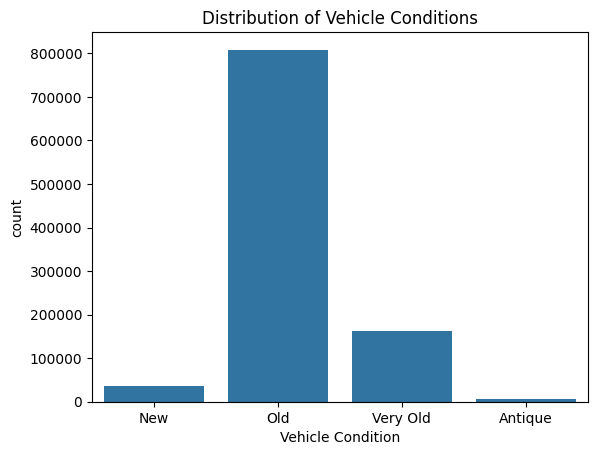

In [28]:
sns.countplot(data=data, x='Vehicle Condition', order=['New', 'Old', 'Very Old', 'Antique'])
plt.title("Distribution of Vehicle Conditions")
plt.show()

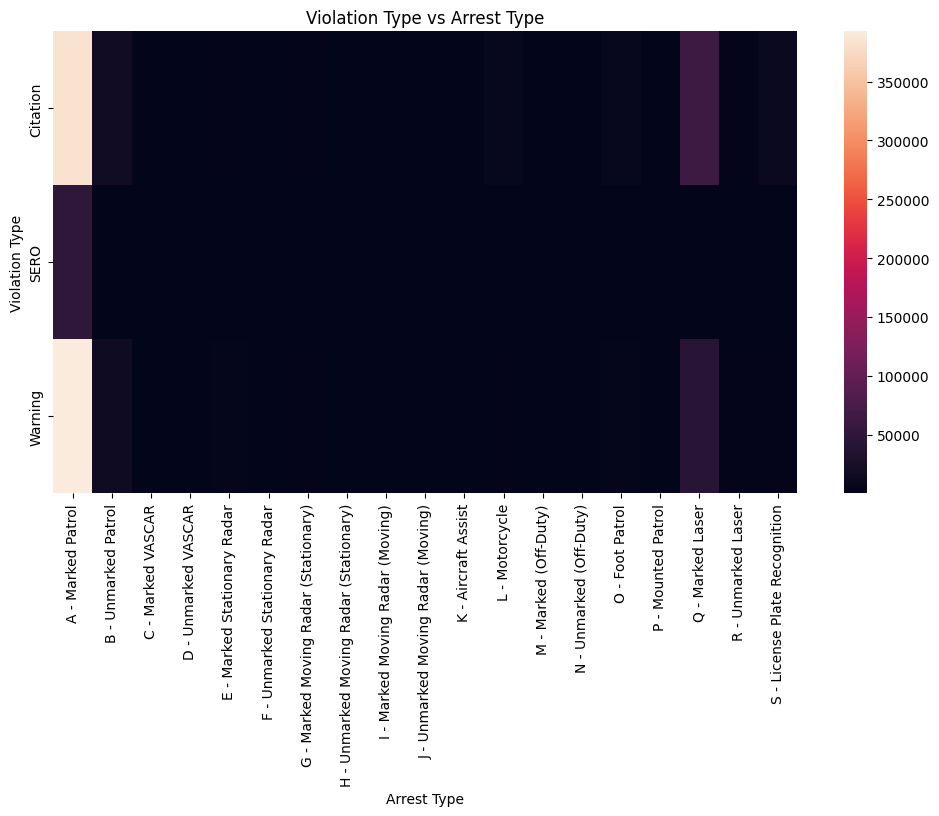

In [29]:
# Grouped analysis
violation_arrest = data.groupby(['Violation Type', 'Arrest Type']).size().unstack().fillna(0)

# Heatmap of Violation Type vs Arrest Type
plt.figure(figsize=(12, 6))
sns.heatmap(violation_arrest, annot=False, cbar=True)
plt.title("Violation Type vs Arrest Type")
plt.show()


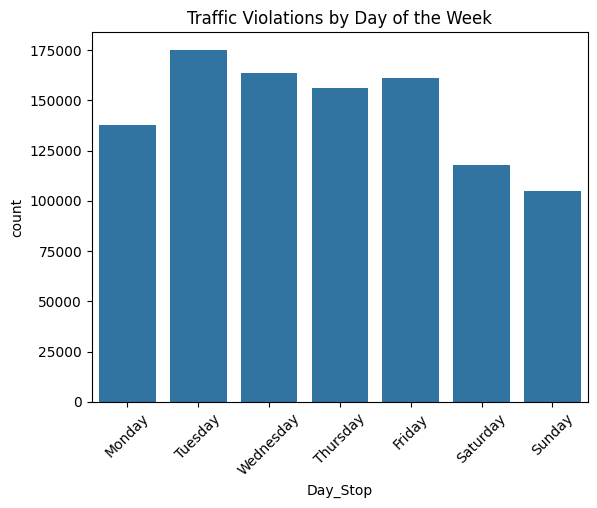

In [30]:
sns.countplot(data=data, x='Day_Stop', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Traffic Violations by Day of the Week")
plt.xticks(rotation=45)
plt.show()


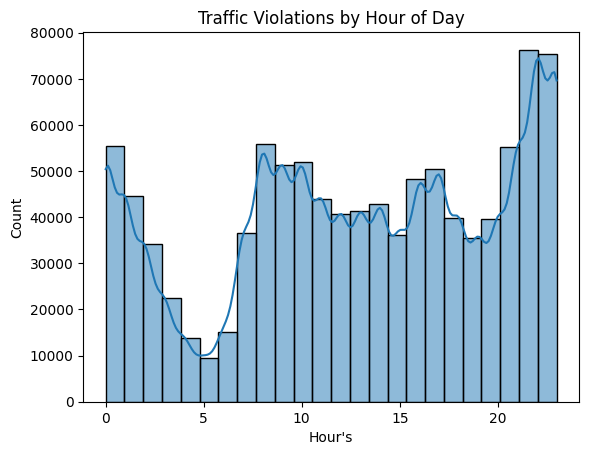

In [31]:
data['Hour_Stop'] = pd.to_datetime(data['Time Of Stop'], format='%H:%M:%S').dt.hour
# # Plot violations by hour of the day
sns.histplot(data['Hour_Stop'], bins=24, kde=True)
plt.title("Traffic Violations by Hour of Day")
plt.xlabel("Hour's")
plt.show()

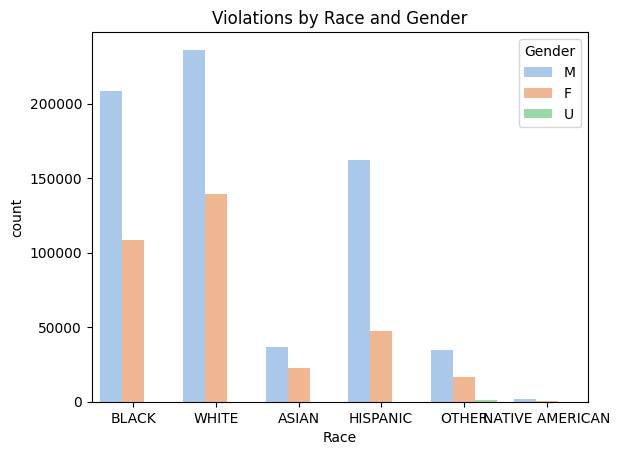

In [32]:
# Distribution of violations by race and gender
sns.countplot(data=data, x='Race', hue='Gender', palette='pastel')
plt.title("Violations by Race and Gender")
plt.show()


In [33]:
import pandas as pd
from scipy.stats import chi2_contingency

# Define the columns to analyze
columns_to_analyze = ['Belts', 'Personal Injury', 'Property Damage', 'Fatal']

# Function to calculate the chi-squared test for each column against Vehicle Condition
def analyze_correlation(df, target_column, condition_column):
    results = {}
    for column in target_column:
        # Create a contingency table
        contingency_table = pd.crosstab(df[column], df[condition_column])
        
        # Perform Chi-squared test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Store results
        results[column] = {'Chi2 Statistic': chi2, 'P-Value': p, 'Degrees of Freedom': dof}
        
        print(f"Correlation between {column} and {condition_column}:\n")
        print("Contingency Table:\n", contingency_table)
        print(f"Chi2 Statistic: {chi2:.2f}, P-Value: {p:.4f}, Degrees of Freedom: {dof}\n")
        print("-" * 50)
    
    return results

# Analyze correlation between selected columns and Vehicle Condition
correlation_results = analyze_correlation(data, columns_to_analyze, 'Vehicle Condition')


Correlation between Belts and Vehicle Condition:

Contingency Table:
 Vehicle Condition  Antique    New     Old  Very Old
Belts                                              
No                    7281  35414  778490    158186
Yes                     37   1407   29990      5210
Chi2 Statistic: 314.01, P-Value: 0.0000, Degrees of Freedom: 3

--------------------------------------------------
Correlation between Personal Injury and Vehicle Condition:

Contingency Table:
 Vehicle Condition  Antique    New     Old  Very Old
Personal Injury                                    
No                    7195  36355  799233    161534
Yes                    123    466    9247      1862
Chi2 Statistic: 22.85, P-Value: 0.0000, Degrees of Freedom: 3

--------------------------------------------------
Correlation between Property Damage and Vehicle Condition:

Contingency Table:
 Vehicle Condition  Antique    New     Old  Very Old
Property Damage                                    
No                   

/var/folders/46/t3rw97mn6xj3h4x75kb2hcq80000gq/T/ipykernel_3852/640442441.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_geo ['Cluster'] = kmeans.labels_


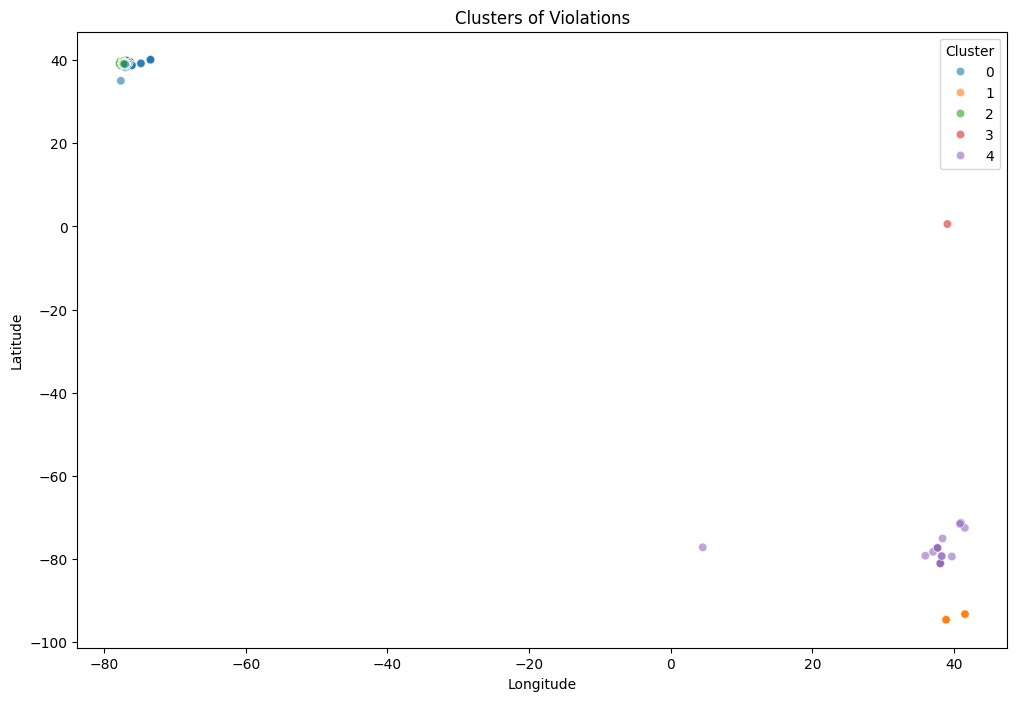

In [34]:
from sklearn.cluster import KMeans

df_valid_geo  = data.dropna(subset=['Latitude', 'Longitude'])
coords = df_valid_geo [['Latitude', 'Longitude']]

kmeans = KMeans(n_clusters=5, random_state=42).fit(coords)
df_valid_geo ['Cluster'] = kmeans.labels_

# Plot clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df_valid_geo ['Longitude'],
    y=df_valid_geo ['Latitude'],
    hue=df_valid_geo ['Cluster'],
    palette="tab10",
    alpha=0.6
)
plt.title("Clusters of Violations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()


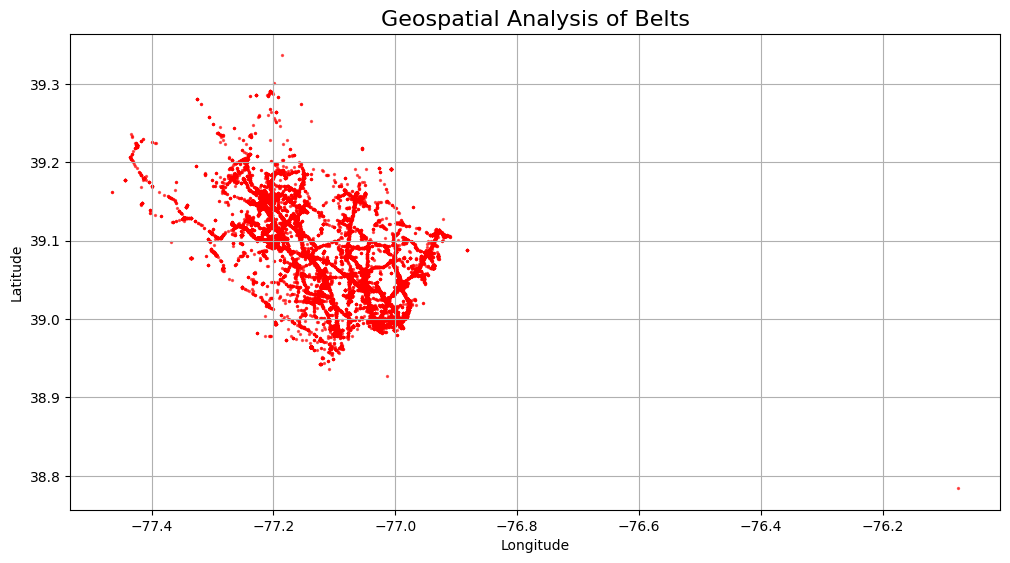

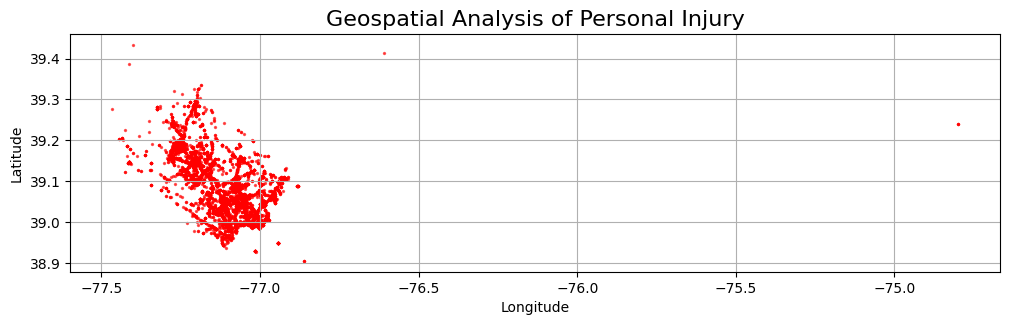

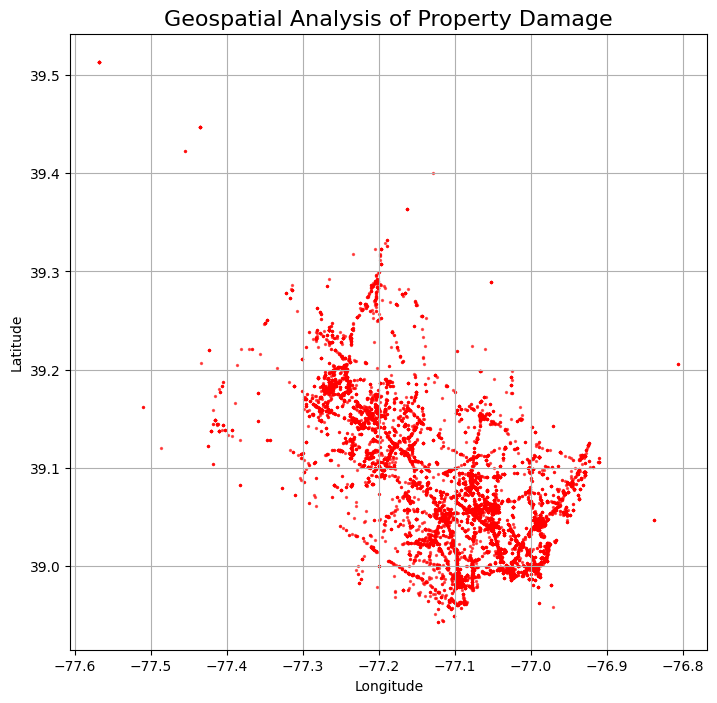

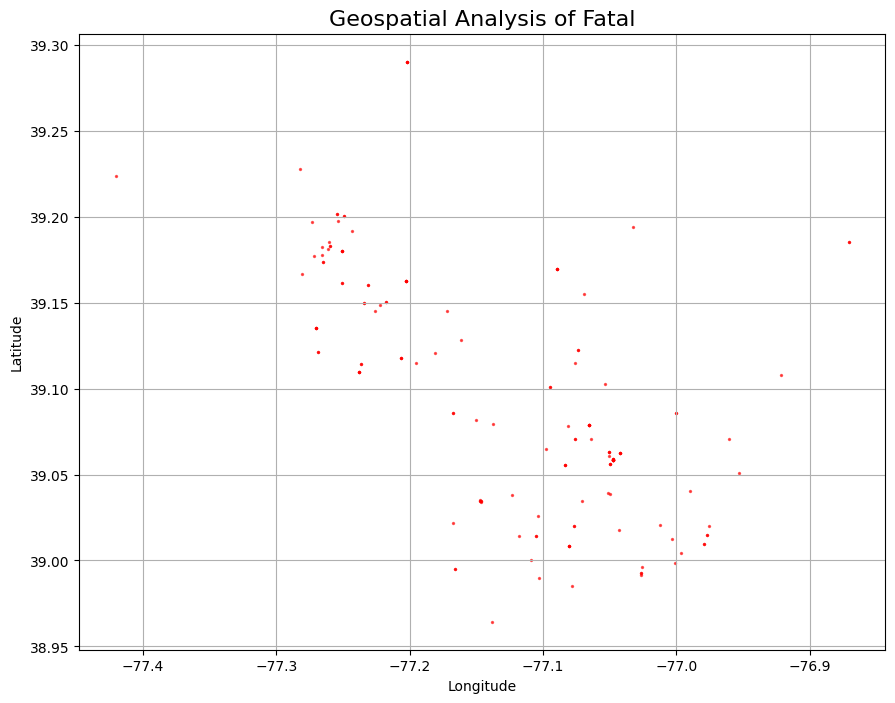

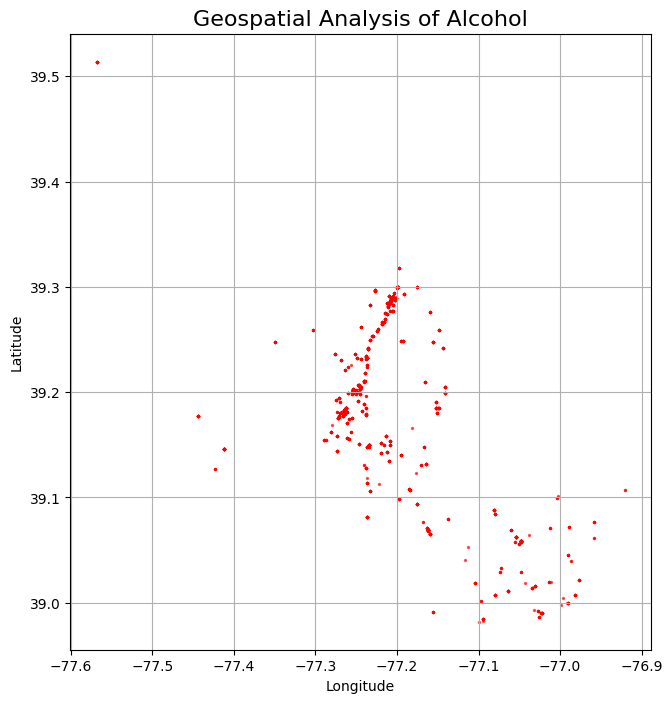

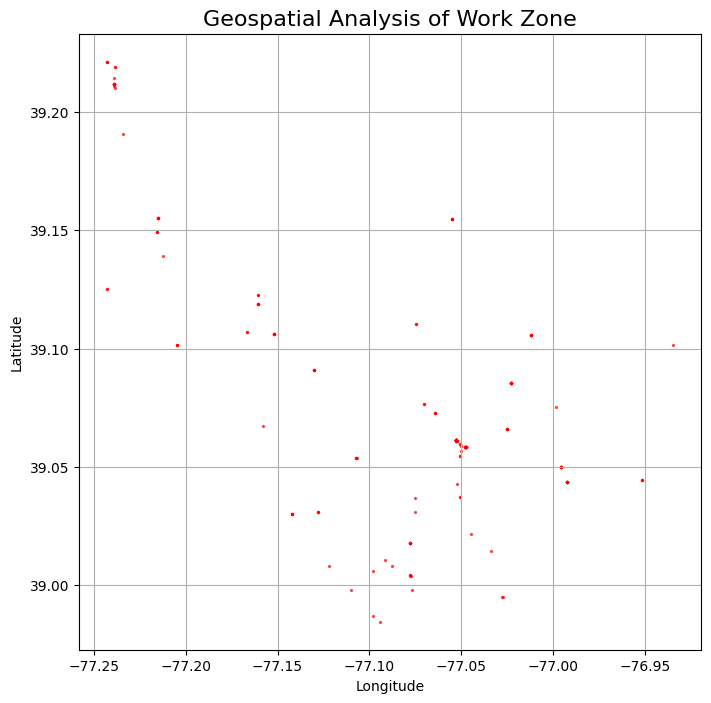

In [35]:
import geopandas as gpd
from shapely.geometry import Point

# Create geometry points from latitude and longitude
geometry = [Point(xy) for xy in zip(df_valid_geo['Longitude'], df_valid_geo['Latitude'])]
geo_df = gpd.GeoDataFrame(df_valid_geo, geometry=geometry, crs="EPSG:4326")

# Define columns for analysis
columns_to_plot = ['Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Alcohol', 'Work Zone']

# Generate plots for each column
for column in columns_to_plot:
    plt.figure(figsize=(12, 8))
    geo_df[geo_df[column] == 'Yes'].plot(
        markersize=2, alpha=0.6, color='red', legend=True, ax=plt.gca()
    )
    plt.title(f"Geospatial Analysis of {column}", fontsize=16)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()


<Figure size 1200x800 with 0 Axes>

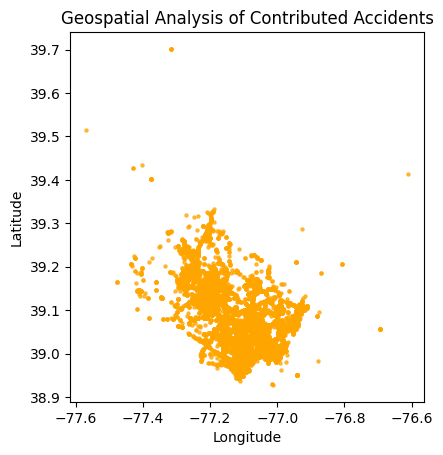

In [36]:
# Filter accidents and contributing factors
contributed_accidents = geo_df[geo_df['Contributed To Accident'] == 'Yes']

# Plot locations with contributing factors
plt.figure(figsize=(12, 8))
contributed_accidents.plot(markersize=5, alpha=0.7, color="orange")
plt.title("Geospatial Analysis of Contributed Accidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
vehicle_condition_map = {'New': 3, 'Old': 2, 'Very Old': 1, 'Antique': 0}
data['Vehicle Condition Numeric'] = data['Vehicle Condition'].map(vehicle_condition_map)

#relevant features
features = ['Hour_Stop', 'Day_Stop', 'Month_Stop', 'Year_Stop', 
            'Latitude', 'Longitude', 'Race', 'Gender', 'Vehicle Condition Numeric']
target = 'Violation Type'

data_encoded = data.copy()
le = LabelEncoder()
data_encoded['Race'] = le.fit_transform(data['Race'])
data_encoded['Gender'] = le.fit_transform(data['Gender'])
data_encoded[target] = le.fit_transform(data[target])  # Encode target variable



In [38]:
data_encoded['Day_Stop'] = le.fit_transform(data['Day_Stop'])

In [39]:
X = data_encoded[features].dropna()
y = data_encoded.loc[X.index, target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [41]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)


In [43]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [44]:
# Evaluation
print("Logistic Regression:", classification_report(y_test, y_pred_lr))
print("Decision Tree:", classification_report(y_test, y_pred_dt))
print("Random Forest:", classification_report(y_test, y_pred_rf))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Logistic Regression:               precision    recall  f1-score   support

           0       0.53      0.57      0.55    134069
           1       0.00      0.00      0.00     14554
           2       0.52      0.53      0.52    130794

    accuracy                           0.52    279417
   macro avg       0.35      0.37      0.36    279417
weighted avg       0.49      0.52      0.51    279417

Decision Tree:               precision    recall  f1-score   support

           0       0.71      0.77      0.74    134069
           1       0.22      0.21      0.21     14554
           2       0.72      0.65      0.68    130794

    accuracy                           0.69    279417
   macro avg       0.55      0.55      0.55    279417
weighted avg       0.69      0.69      0.69    279417

Random Forest:               precision    recall  f1-score   support

           0       0.76      0.76      0.76    134069
           1       0.33      0.15      0.20     14554
           2       0.72 

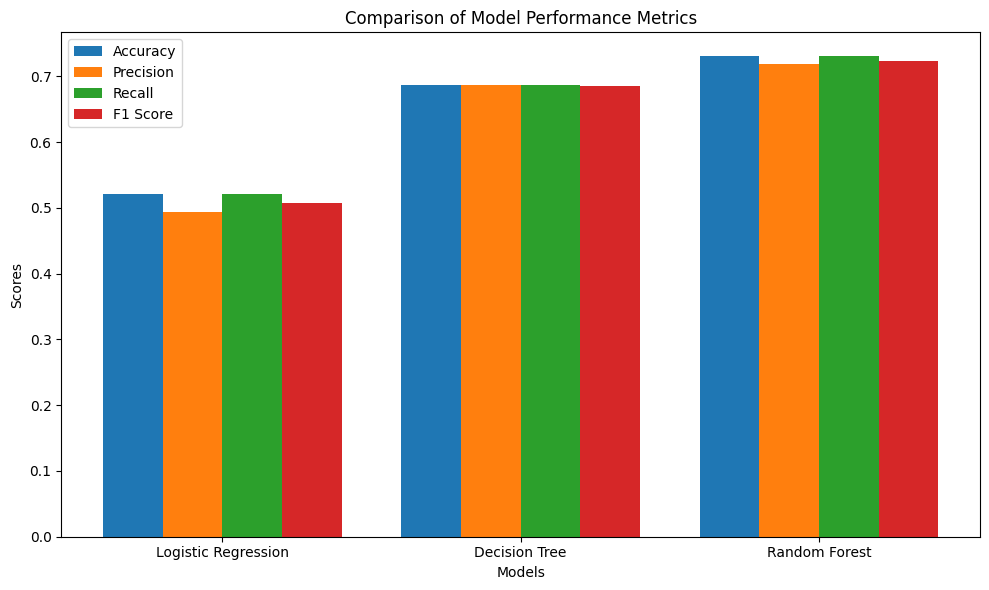

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a dictionary to store models and their names
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dtree,
    'Random Forest': rf
}

# Initialize lists to store metric scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate metrics for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Plotting the evaluation metrics
import matplotlib.pyplot as plt
import numpy as np

# Set up bar chart positions
bar_width = 0.2
index = np.arange(len(models))

# Create the bar charts
plt.figure(figsize=(10, 6))
plt.bar(index, accuracy_scores, bar_width, label='Accuracy')
plt.bar(index + bar_width, precision_scores, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recall_scores, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(index + 1.5 * bar_width, models.keys())
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()